In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [4]:
filename ='../original_dataset/pd_speech_features.csv'
dataframe = pd.read_csv(filename)

In [5]:
dataframe.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


# Data Extraction from the dataset
Baseline Features: Column-3 to Column-23 Intensity Parameters: Col24 to Col26 Formant Frequencies: Col27 to Col30 Bandwidth Parameters: Col31 to Col34 Vocal Fold: Col35 to Col56 MFCC: Col57 to Col140 Wavelet Features: Col141 to Col322 TQWT Features: Col323 to Col754 Class: Col755

Refer Research Page: 6 - 9

In [6]:
baseline = dataframe.iloc[:,2:23]
intensity = dataframe.iloc[:,23:26]
frequency = dataframe.iloc[:,26:30]
bandwidth = dataframe.iloc[:,30:34]
vocal = dataframe.iloc[:,34:56]
mfcc = dataframe.iloc[:,56:140]
wavelet = dataframe.iloc[:,140:322]
tqwt = dataframe.iloc[:,322:755]
y = dataframe['class']

# Baseline Columns


In [7]:
std_value_columns = [cols for cols in baseline.columns if cols.__contains__('std')]
other_columns = list(set(baseline.columns) - set(std_value_columns))

In [8]:
extracted_df = baseline[other_columns].join([intensity,frequency,bandwidth,y])
extracted_df.shape

(756, 32)

# Exploratory_data_analysis

In [9]:
extracted_df.columns #checking columns

Index(['DFA', 'ppq5Jitter', 'RPDE', 'numPulses', 'locDbShimmer',
       'meanPeriodPulses', 'meanHarmToNoiseHarmonicity', 'numPeriodsPulses',
       'apq5Shimmer', 'locAbsJitter', 'PPE', 'locShimmer', 'rapJitter',
       'meanNoiseToHarmHarmonicity', 'meanAutoCorrHarmonicity', 'ddpJitter',
       'apq3Shimmer', 'ddaShimmer', 'locPctJitter', 'apq11Shimmer',
       'minIntensity', 'maxIntensity', 'meanIntensity', 'f1', 'f2', 'f3', 'f4',
       'b1', 'b2', 'b3', 'b4', 'class'],
      dtype='object')

In [10]:
extracted_df= extracted_df.astype(float) #converting data types from object to float
extracted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   DFA                         756 non-null    float64
 1   ppq5Jitter                  756 non-null    float64
 2   RPDE                        756 non-null    float64
 3   numPulses                   756 non-null    float64
 4   locDbShimmer                756 non-null    float64
 5   meanPeriodPulses            756 non-null    float64
 6   meanHarmToNoiseHarmonicity  756 non-null    float64
 7   numPeriodsPulses            756 non-null    float64
 8   apq5Shimmer                 756 non-null    float64
 9   locAbsJitter                756 non-null    float64
 10  PPE                         756 non-null    float64
 11  locShimmer                  756 non-null    float64
 12  rapJitter                   756 non-null    float64
 13  meanNoiseToHarmHarmonicity  756 non

<AxesSubplot:>

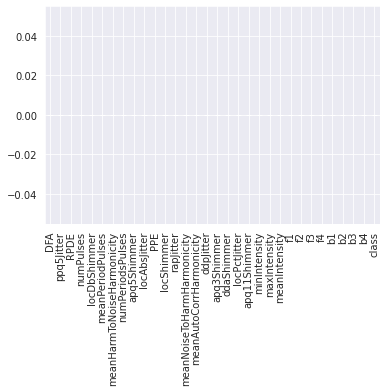

In [11]:
#checking for missing values
extracted_df.isnull().sum().plot(kind='bar')

In [12]:
extracted_df.describe()

,DFA,ppq5Jitter,RPDE,numPulses,locDbShimmer,meanPeriodPulses,meanHarmToNoiseHarmonicity,numPeriodsPulses,apq5Shimmer,locAbsJitter,...,meanIntensity,f1,f2,f3,f4,b1,b2,b3,b4,class
count,756.000000,756.000000,756.000000,756.000000,756.00000,756.000000,756.000000,756.000000,756.000000,7.560000e+02,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,0.700414,0.001159,0.489058,323.972222,0.60642,0.006360,18.859632,322.678571,0.041175,1.673391e-05,...,73.997008,647.174519,1233.852088,2562.425251,3547.259244,213.363237,297.174077,536.821070,506.604856,0.746032
std,0.069718,0.001677,0.137442,99.219059,0.38257,0.001826,5.576473,99.402499,0.027165,2.290134e-05,...,7.018006,134.957916,169.090402,393.315598,347.864299,306.976045,450.125488,754.341717,658.326606,0.435568
min,0.543500,0.000050,0.154300,2.000000,0.05700,0.002107,1.655000,1.000000,0.004150,6.860000e-07,...,39.984109,237.149533,761.357661,1411.231297,2471.996546,13.525000,16.428803,21.164397,22.842528,0.000000
25%,0.647053,0.000370,0.386537,251.000000,0.31875,0.005003,15.713250,250.000000,0.021935,5.260000e-06,...,70.920615,562.879119,1117.316190,2380.426103,3288.644496,90.939702,102.856320,152.783110,170.741827,0.000000
50%,0.700525,0.000650,0.484355,317.000000,0.50250,0.006048,19.309500,316.000000,0.033705,9.530000e-06,...,76.855313,641.181498,1215.344125,2612.204198,3544.012403,141.610973,159.991186,265.964575,307.971279,1.000000
75%,0.754985,0.001253,0.586515,384.250000,0.79650,0.007528,22.877750,383.250000,0.053023,1.832500e-05,...,78.718785,737.222678,1339.826741,2831.959198,3807.332055,234.098376,299.912765,518.822036,557.628796,1.000000
max,0.852640,0.018320,0.871230,907.000000,2.11400,0.012966,33.197000,905.000000,0.199510,2.564800e-04,...,85.096353,1015.524047,1922.747225,3475.648017,4482.258531,4744.875736,4262.170070,6116.039922,5804.342078,1.000000


# Univariate Analysis

## Count Plot

/home/shailesh/Desktop/fuse-project-1/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


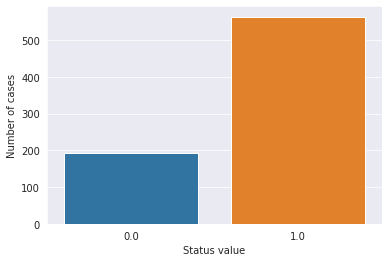

In [14]:
sns.countplot(extracted_df['class'].values)
plt.xlabel("Status value")
plt.ylabel("Number of cases")
plt.show()

# Data visualization

## Distribution Plot

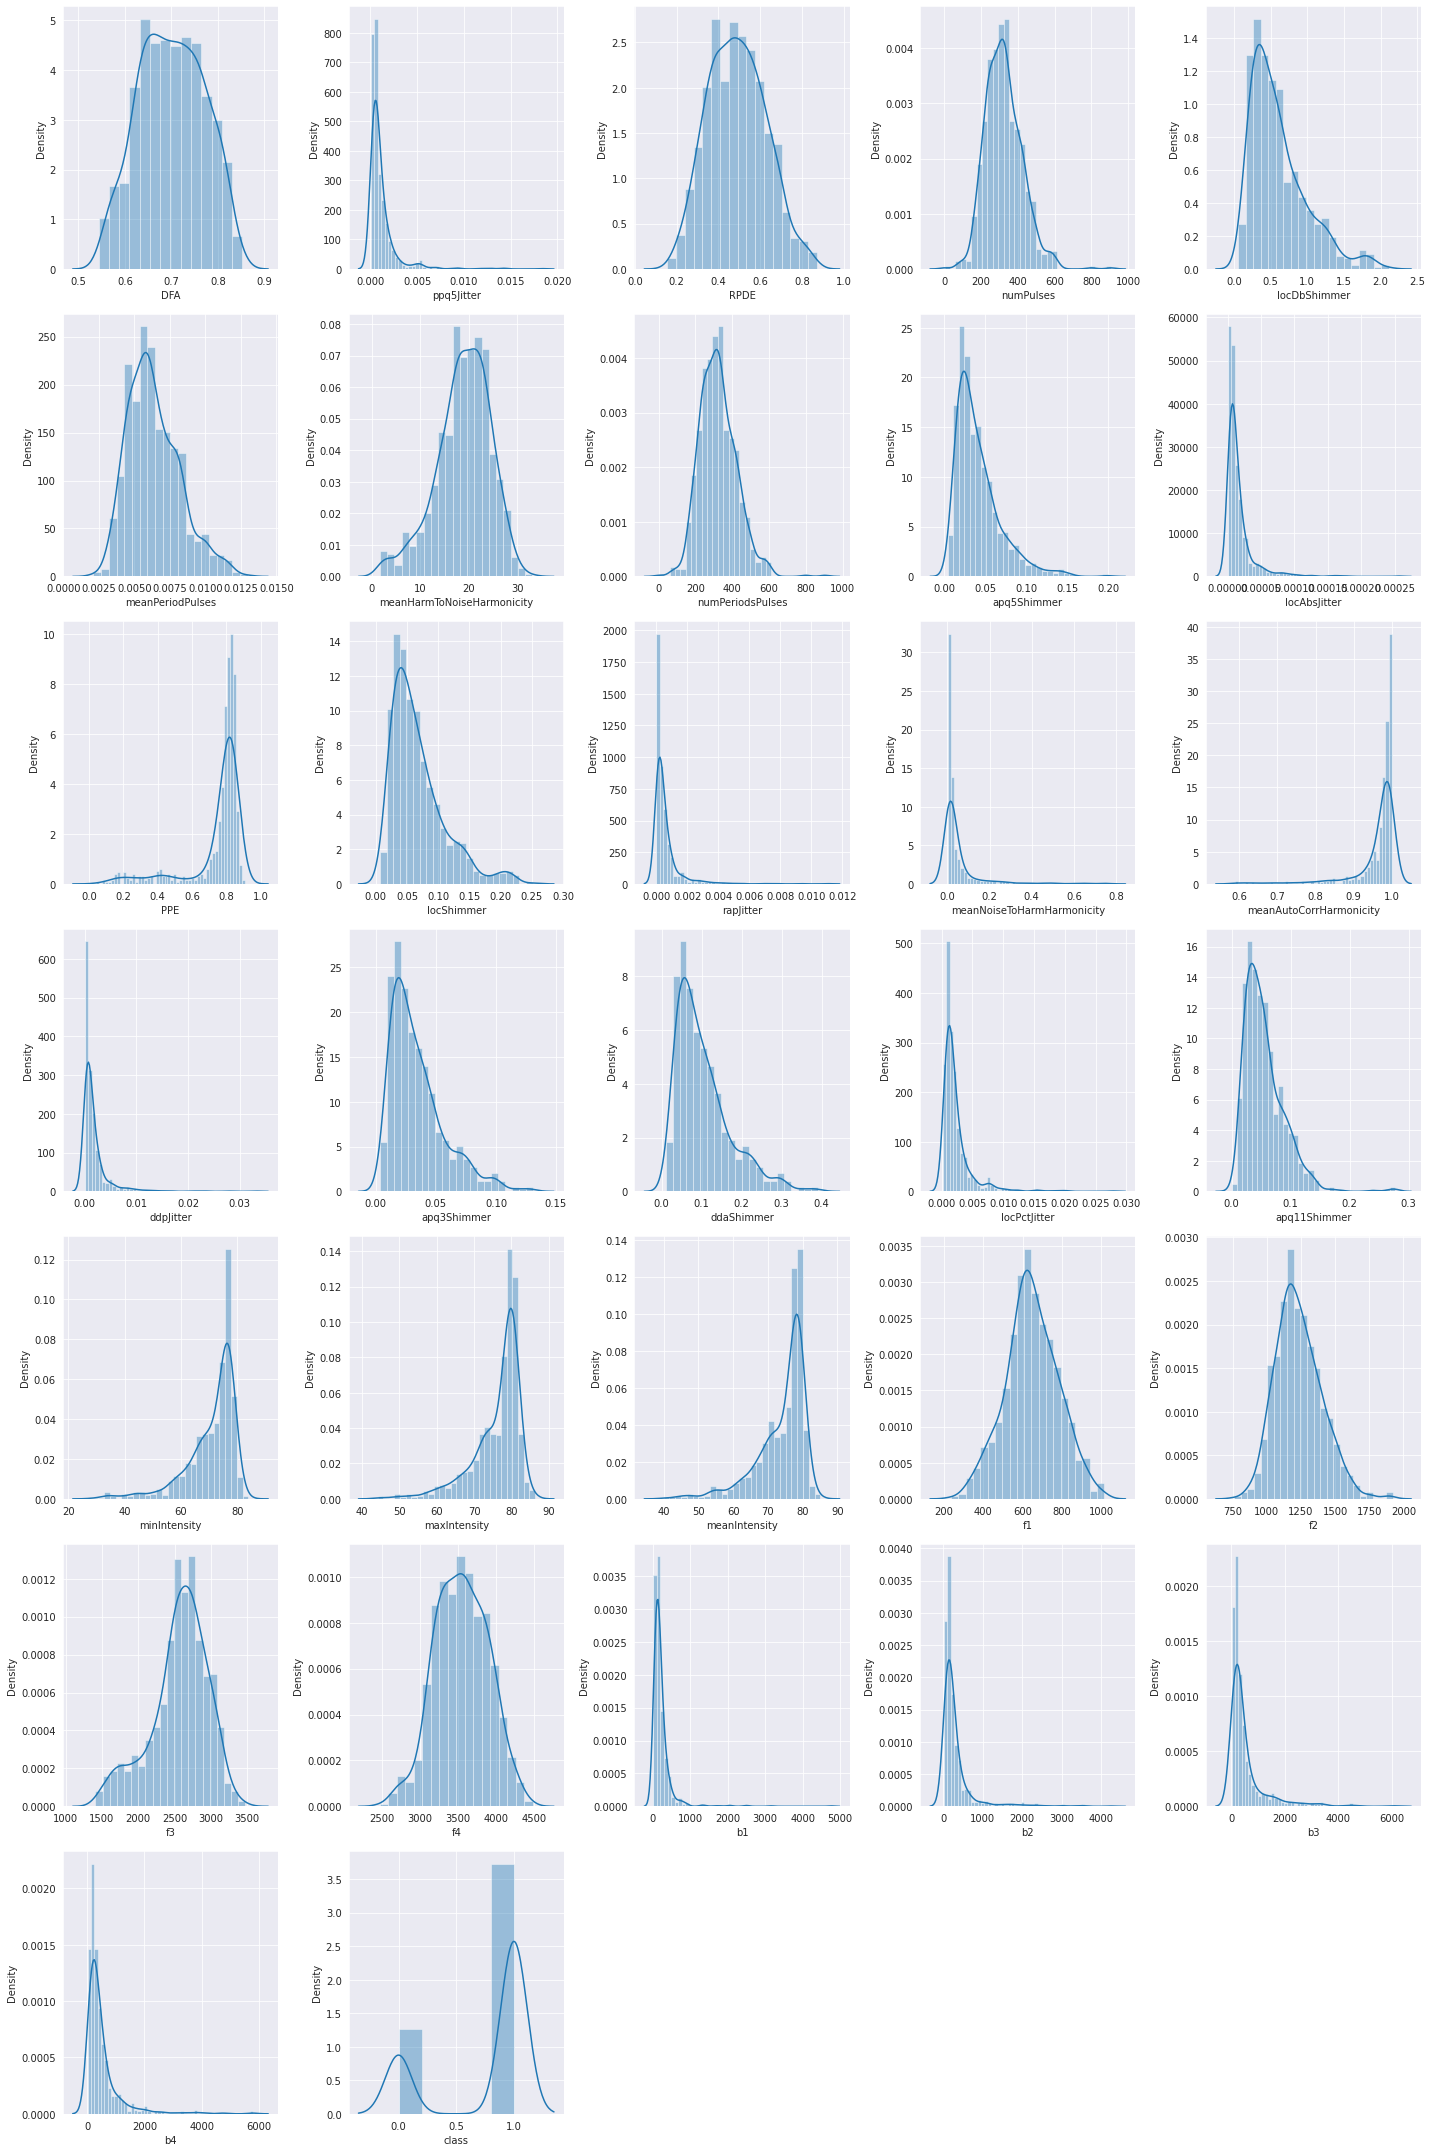

In [17]:
import warnings
warnings.filterwarnings('ignore')


plt.figure(figsize = (20, 30))
plotnumber = 1
for col in extracted_df.columns:
    if plotnumber <= len(extracted_df.columns):
        ax = plt.subplot(7, 5, plotnumber)
        sns.distplot(extracted_df[col])
        plt.xlabel(col)
    
        
    plotnumber += 1

plt.tight_layout()
plt.show()

# KDE Plot


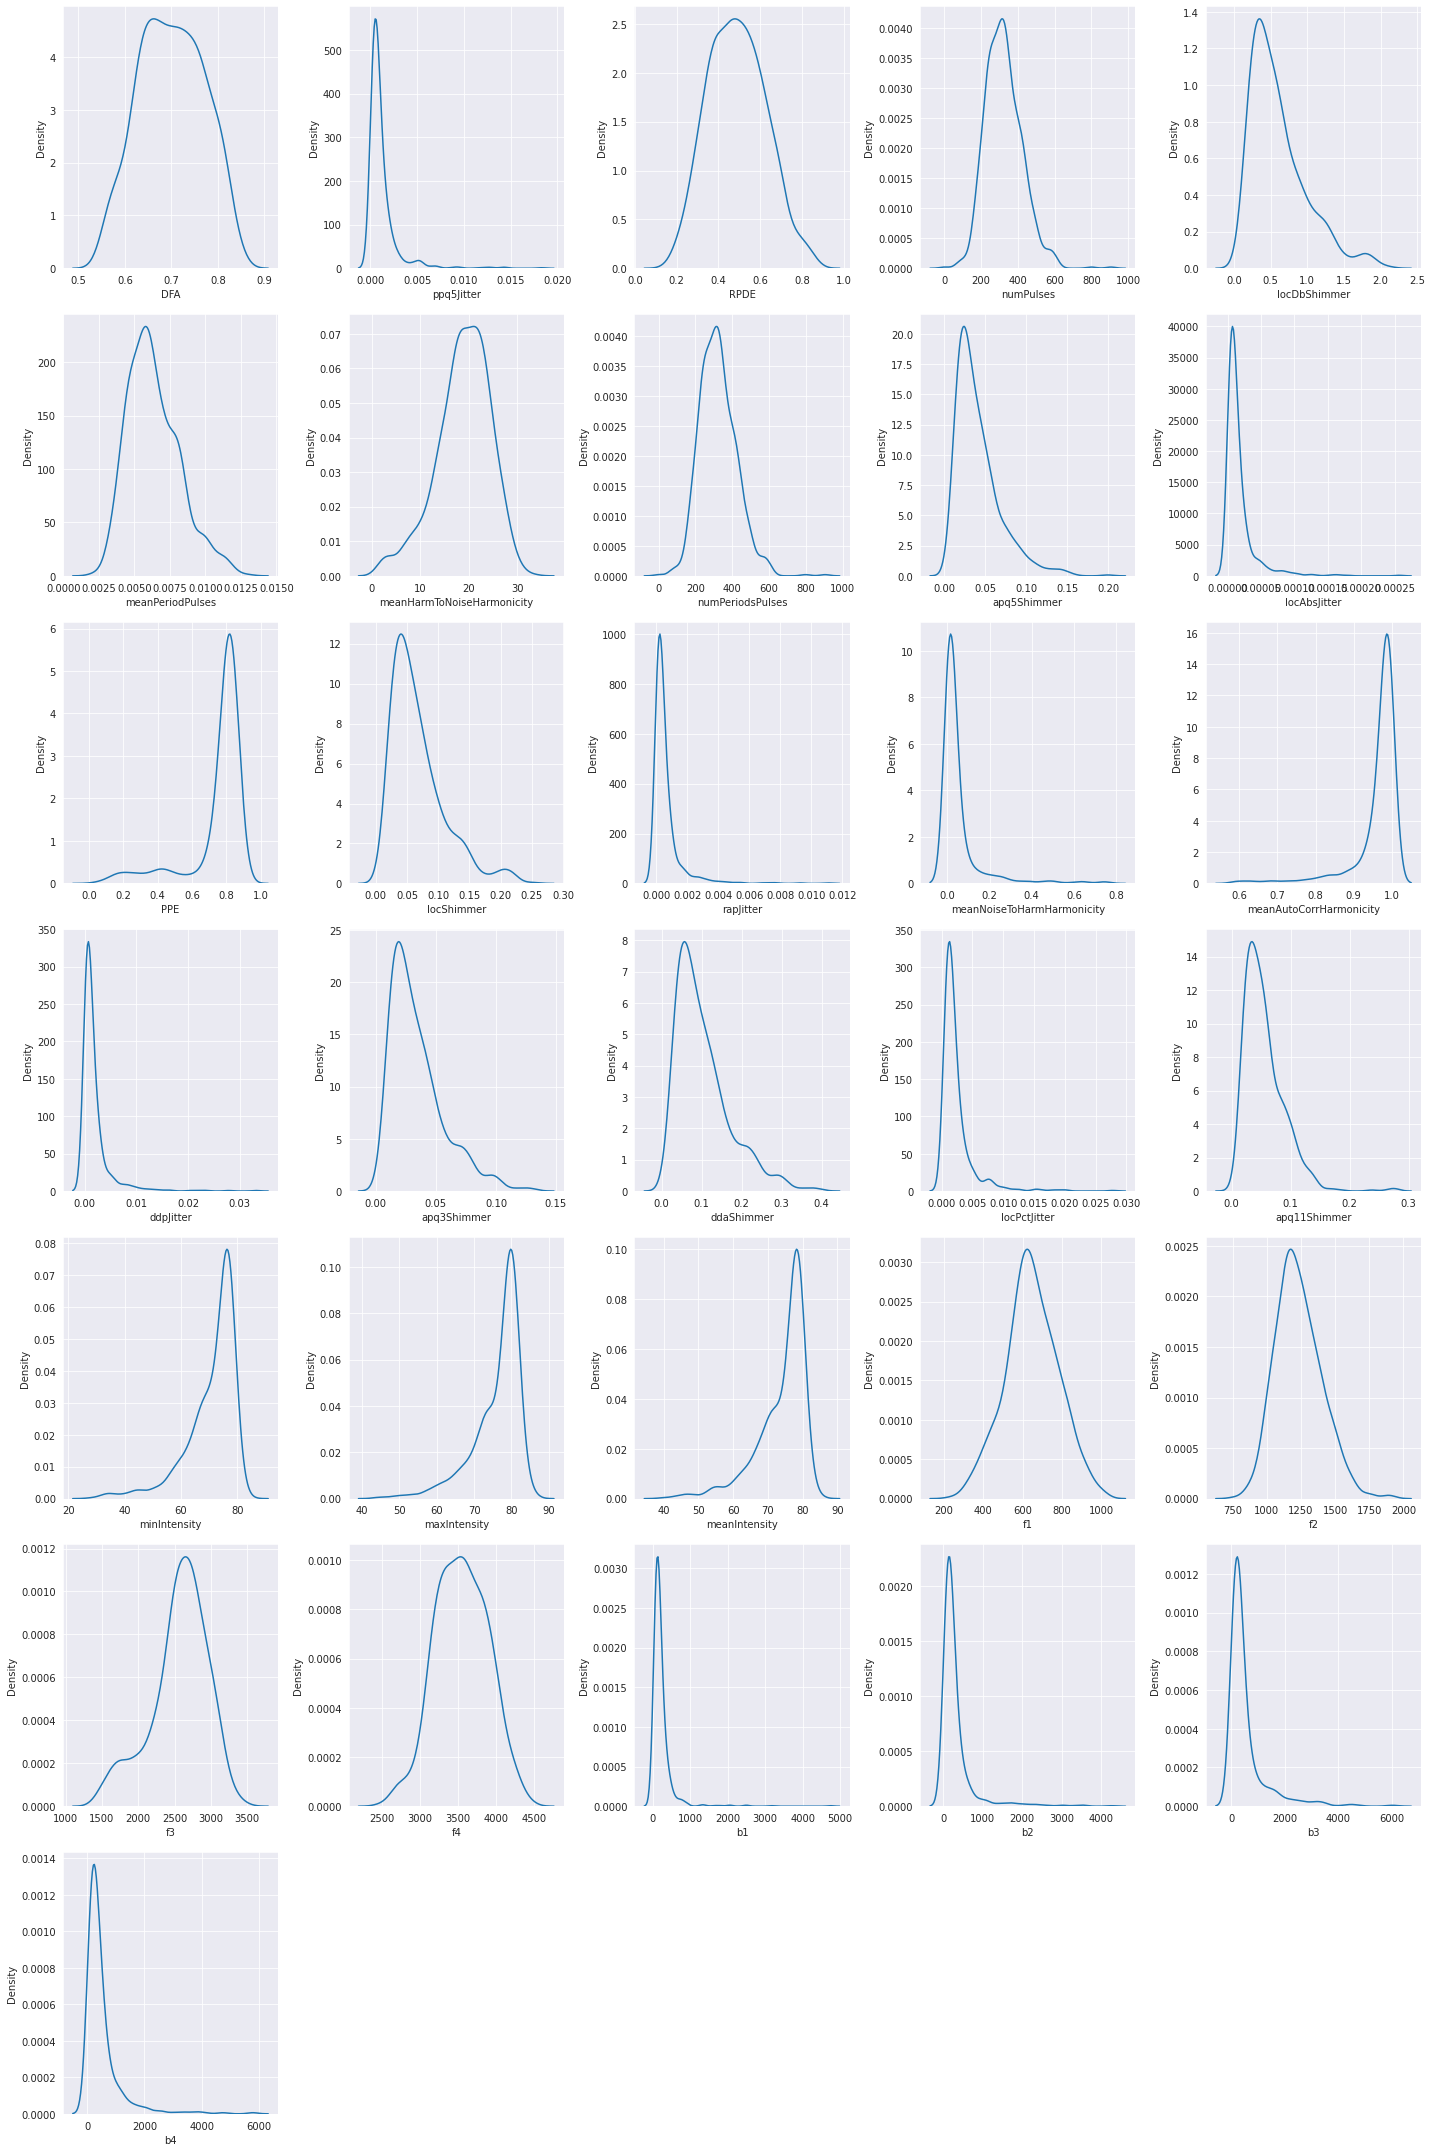

In [18]:
plt.figure(figsize = (20, 30))
plotnumber = 1

for col in extracted_df.columns:
    if plotnumber <= (len(extracted_df.columns)-1):
        ax = plt.subplot(7, 5, plotnumber)
        sns.kdeplot(extracted_df[col]) 
        
    plotnumber += 1

plt.tight_layout()
plt.show()

# Outliers Detection using Box Plot

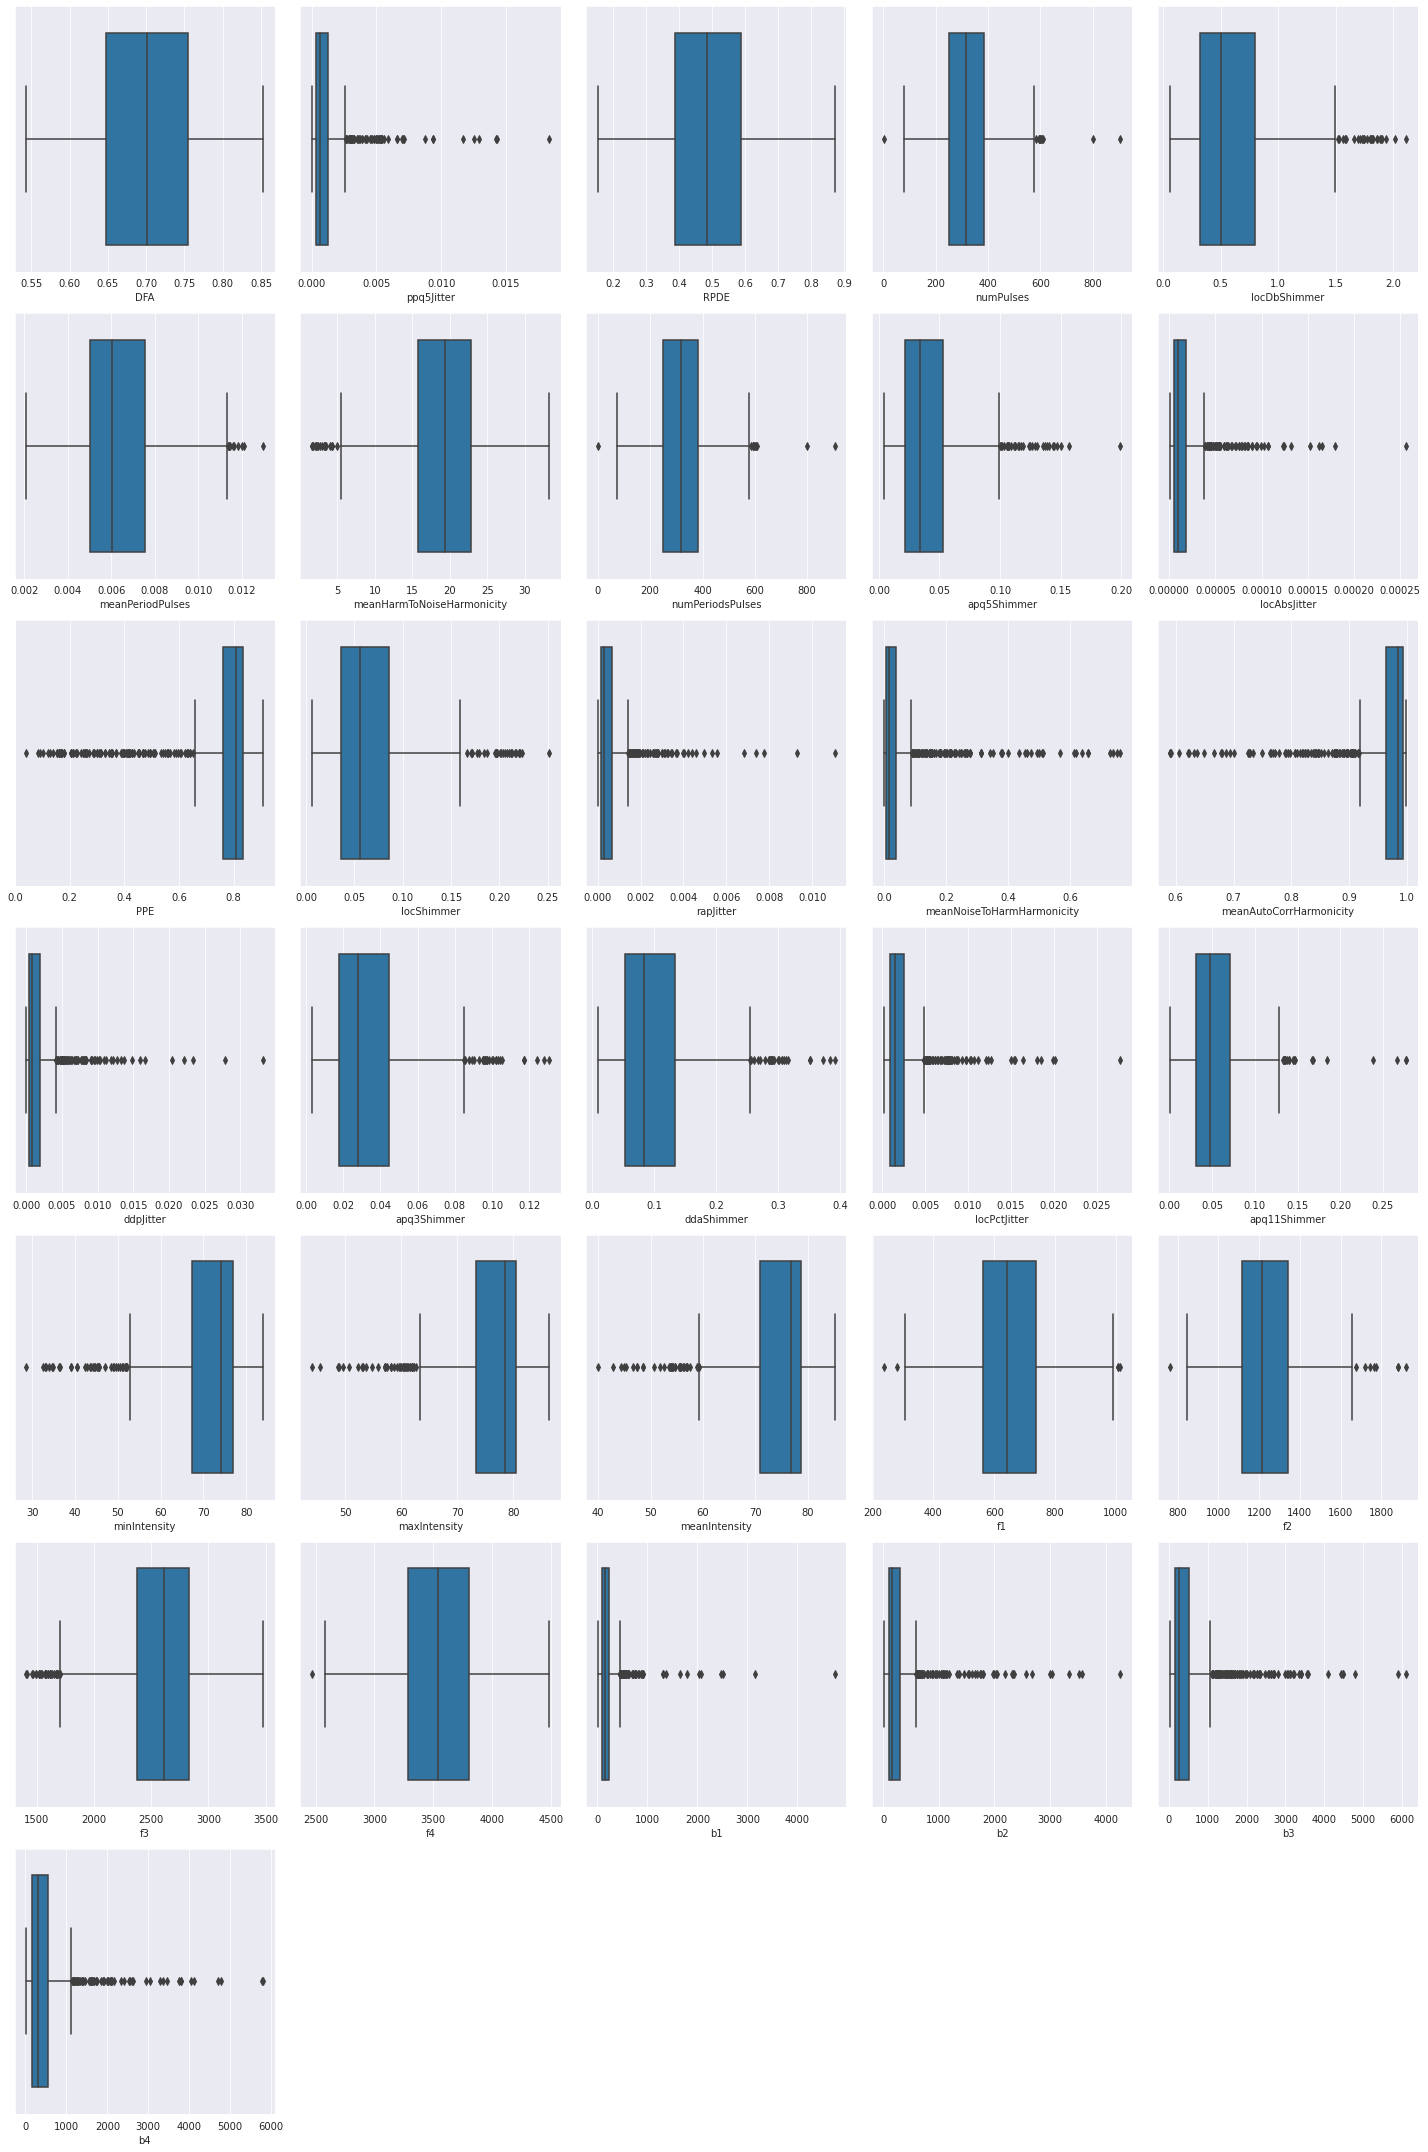

In [19]:
plt.figure(figsize = (20, 30))
plotnumber = 1

for col in extracted_df.columns:
    if plotnumber <= (len(extracted_df.columns)-1):
        ax = plt.subplot(7, 5, plotnumber)
        sns.boxplot(x=col, data=extracted_df) 
        plt.xlabel(col)

        
    plotnumber += 1

plt.tight_layout()
plt.show()

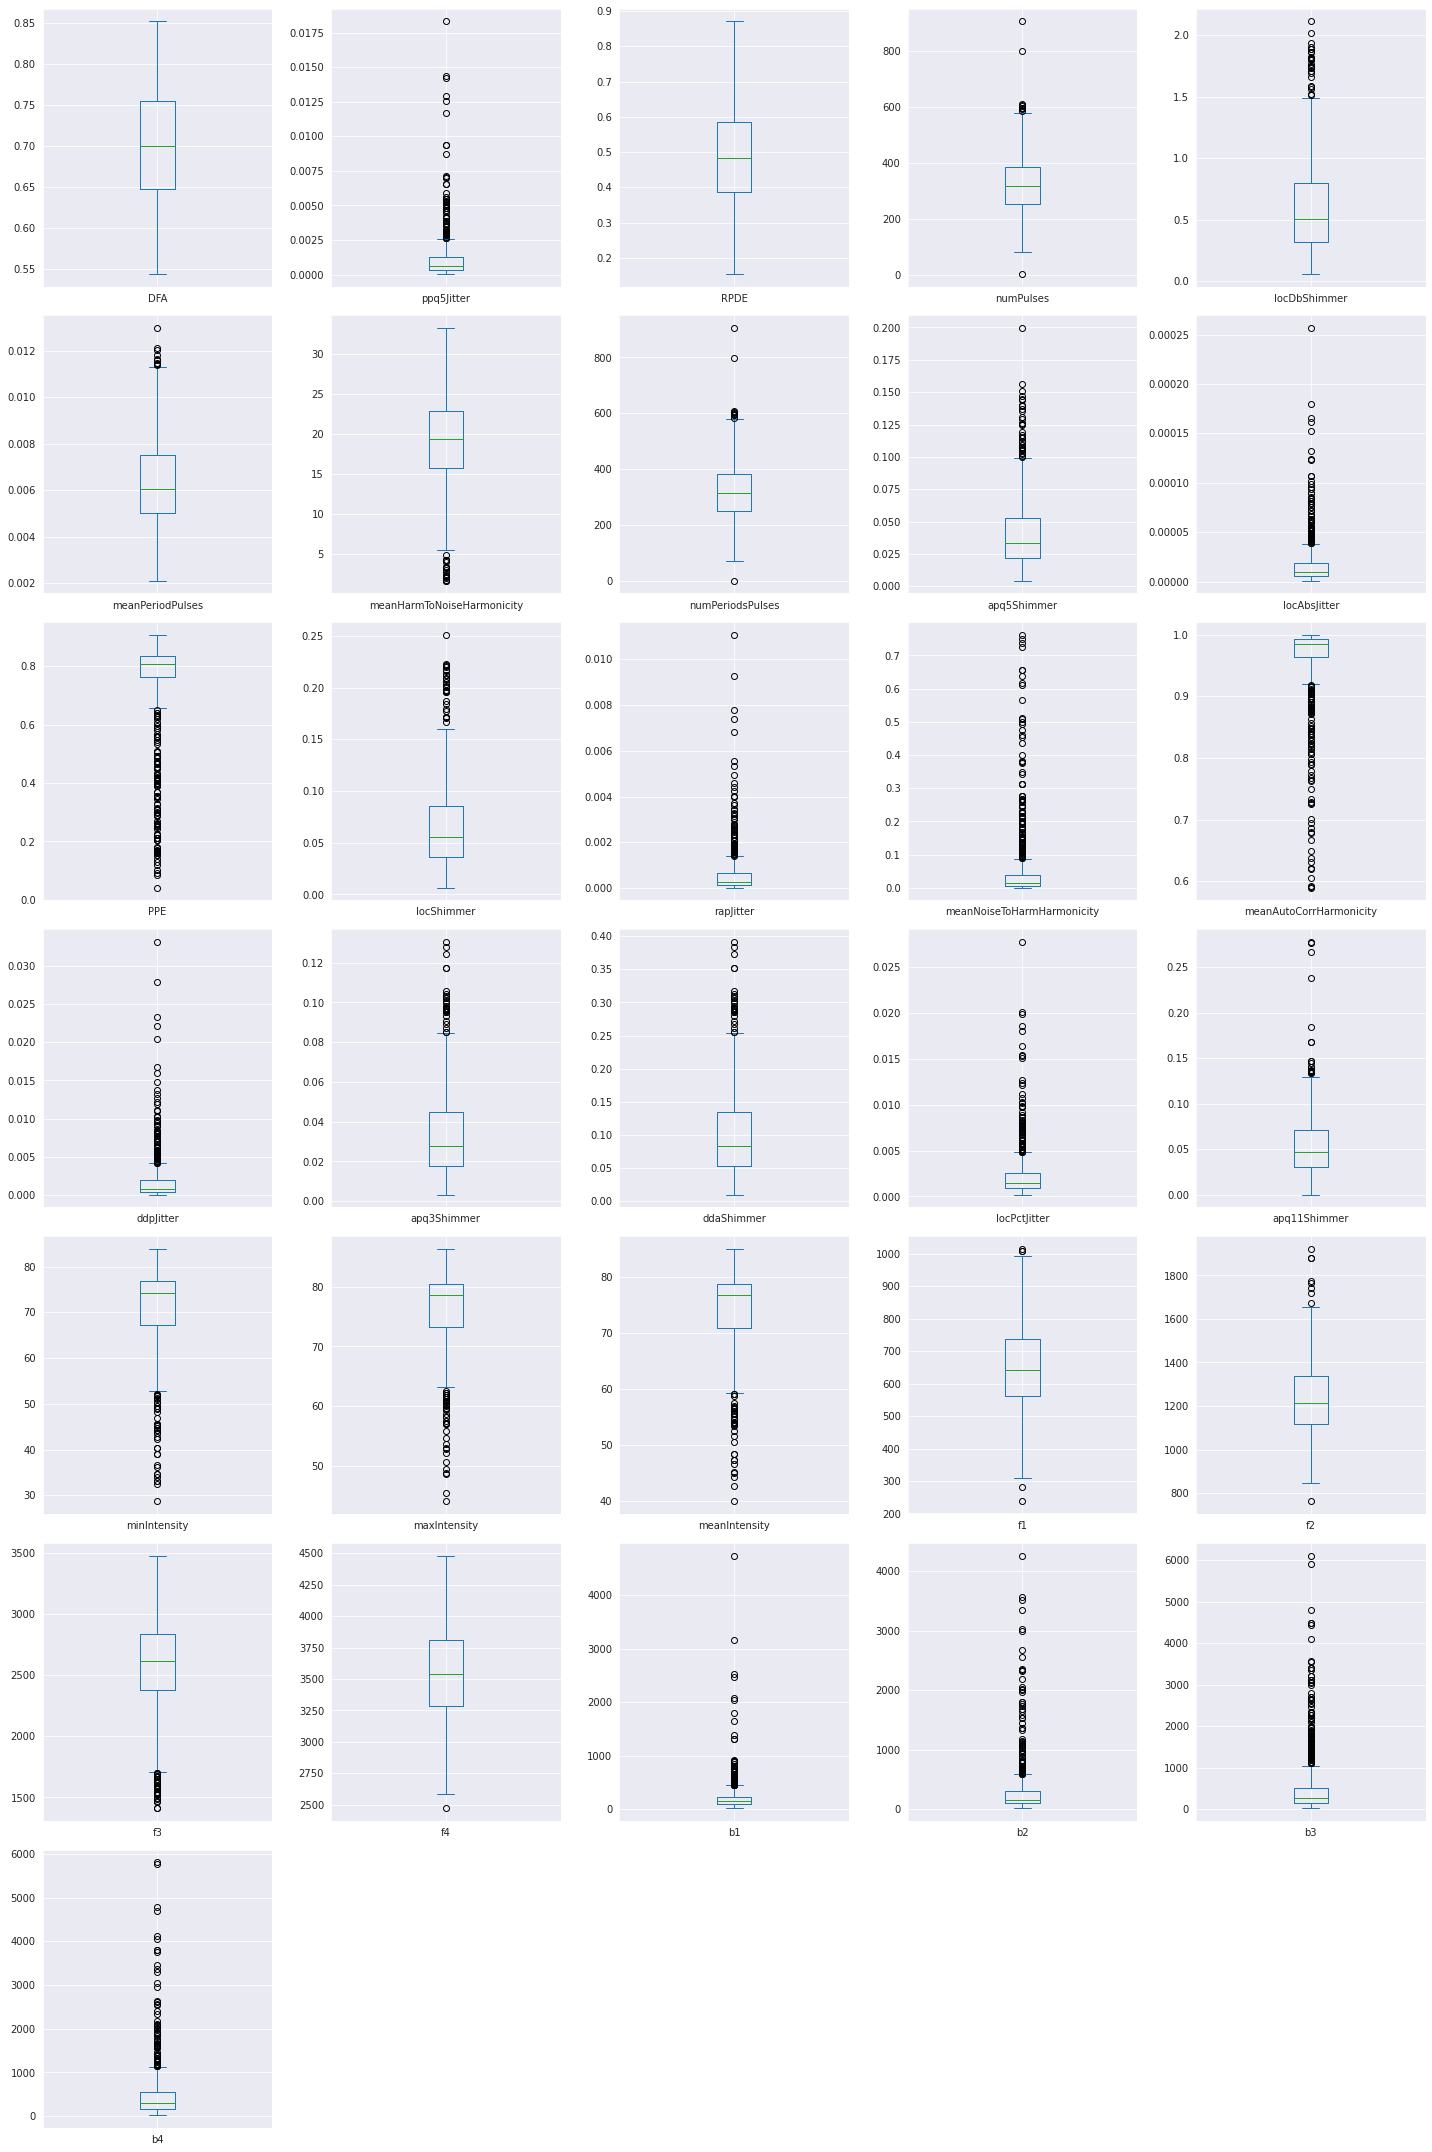

In [20]:
plt.figure(figsize = (20, 30))
plotnumber = 1

for col in extracted_df.columns:
    if plotnumber <= (len(extracted_df.columns)-1):
        ax = plt.subplot(7, 5, plotnumber)
        extracted_df[col].plot(kind='box') 
        
    plotnumber += 1

plt.tight_layout()
plt.show()

# Outliers Detection using Z-score

In [21]:
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers
for col in extracted_df.columns:
    sample_outliers = detect_outliers_zscore(extracted_df[col])
    print("\nnumber of outliers in {}: ".format(col), len(sample_outliers))

0.7004139417989419 0.06967191880647831

number of outliers in DFA:  0
0.0011589665013227513 0.00167560789776722

number of outliers in ppq5Jitter:  14
0.4890576058201058 0.1373515507236781

number of outliers in RPDE:  14
323.97222222222223 99.15341659290341

number of outliers in numPulses:  17
0.6064195357804233 0.3823165222887691

number of outliers in locDbShimmer:  31
0.006360002284391535 0.0018252185178274252

number of outliers in meanPeriodPulses:  34
18.859632275132274 5.572783354824129

number of outliers in meanHarmToNoiseHarmonicity:  39
322.67857142857144 99.33673487342777

number of outliers in numPeriodsPulses:  42
0.04117476328042328 0.02714694228848841

number of outliers in apq5Shimmer:  57
1.6733911375661378e-05 2.2886192448441905e-05

number of outliers in locAbsJitter:  74
0.7462842195767194 0.16918156715627086

number of outliers in PPE:  101
0.06747323413492064 0.04294062696699493

number of outliers in locShimmer:  120
0.0006049931626984126 0.000980063011966523


In [22]:
extracted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   DFA                         756 non-null    float64
 1   ppq5Jitter                  756 non-null    float64
 2   RPDE                        756 non-null    float64
 3   numPulses                   756 non-null    float64
 4   locDbShimmer                756 non-null    float64
 5   meanPeriodPulses            756 non-null    float64
 6   meanHarmToNoiseHarmonicity  756 non-null    float64
 7   numPeriodsPulses            756 non-null    float64
 8   apq5Shimmer                 756 non-null    float64
 9   locAbsJitter                756 non-null    float64
 10  PPE                         756 non-null    float64
 11  locShimmer                  756 non-null    float64
 12  rapJitter                   756 non-null    float64
 13  meanNoiseToHarmHarmonicity  756 non

In [27]:
extracted_df.RPDE.describe()

count    756.000000
mean       0.489058
std        0.137442
min        0.154300
25%        0.386537
50%        0.484355
75%        0.586515
max        0.871230
Name: RPDE, dtype: float64

In [28]:
df = extracted_df.copy()

In [29]:
# compute IQR to calculate boundaries
IQR_apq5 = extracted_df.apq5Shimmer.quantile(0.75) - extracted_df.apq5Shimmer.quantile(0.25)
IQR_apq5

0.0310875

In [30]:
# using inter quartile range(IQR)

lower_bridge = extracted_df.apq5Shimmer.quantile(0.25) - (IQR_apq5*1.5)
upper_bridge = extracted_df.apq5Shimmer.quantile(0.75) + (IQR_apq5*1.5)
upper_bridge, lower_bridge

(0.09965375, -0.02469625)

In [31]:
#Extreme outliers using inter quartile range(IQR)

lower_bridge = extracted_df.apq5Shimmer.quantile(0.25) - (IQR_apq5*3)
upper_bridge = extracted_df.apq5Shimmer.quantile(0.75) + (IQR_apq5*3)
upper_bridge, lower_bridge

(0.146285, -0.0713275)

In [38]:
# assuming apq5Shimmer follows a normal distributiowe will calculate boundaries which will differentiates the outliers
# using standard deviation method if a value is higher or lower by three Standard Deviation from mean is considered as outlier

lower_boundary = extracted_df.apq5Shimmer.mean() - 3*extracted_df.apq5Shimmer.std()
upper_boundary = extracted_df.apq5Shimmer.mean() + 3*extracted_df.apq5Shimmer.std()
upper_boundary, lower_boundary

(0.12266950662108621, -0.040319980060239693)

Text(0.5, 0, 'apq5Shimmer')

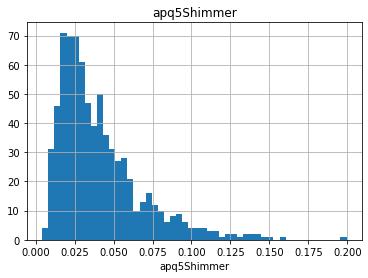

In [32]:
figure = extracted_df.apq5Shimmer.hist(bins=50)
figure.set_title('apq5Shimmer')
figure.set_xlabel('apq5Shimmer')

In [33]:
# By observing above calculated values
df.loc[df.apq5Shimmer>=0.09, 'apq5Shimmer'] = 0.09

Text(0.5, 0, 'apq5Shimmer')

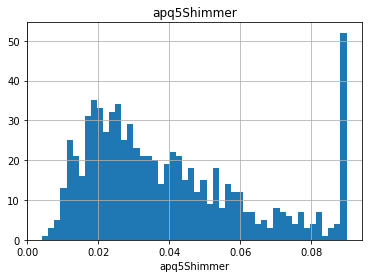

In [34]:
figure = df.apq5Shimmer.hist(bins=50)
figure.set_title('apq5Shimmer')
figure.set_xlabel('apq5Shimmer')

<AxesSubplot:>

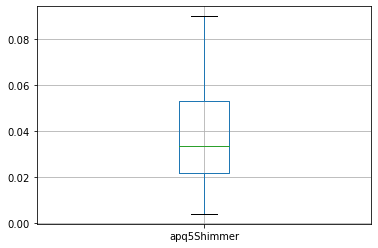

In [35]:
df.boxplot(column='apq5Shimmer')

In [36]:
# compute IQR to calculate boundaries
IQR_locdb = extracted_df.locDbShimmer.quantile(0.75) - extracted_df.locDbShimmer.quantile(0.25)
IQR_locdb

0.47775

In [37]:
lower_bridge = extracted_df.locDbShimmer.quantile(0.25) - (IQR_locdb*1.5)
upper_bridge = extracted_df.locDbShimmer.quantile(0.75) + (IQR_locdb*1.5)
upper_bridge, lower_bridge

(1.513125, -0.3978750000000001)

In [38]:
# extreme outliers
lower_bridge = extracted_df.locDbShimmer.quantile(0.25) - (IQR_locdb*3)
upper_bridge = extracted_df.locDbShimmer.quantile(0.75) + (IQR_locdb*3)
upper_bridge, lower_bridge

(2.22975, -1.1145)

Text(0.5, 0, 'RDPE')

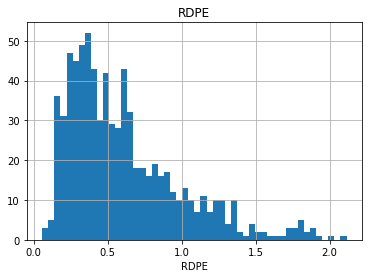

In [39]:
figure = extracted_df.locDbShimmer.hist(bins=50)
figure.set_title('RDPE')
figure.set_xlabel('RDPE')

<AxesSubplot:>

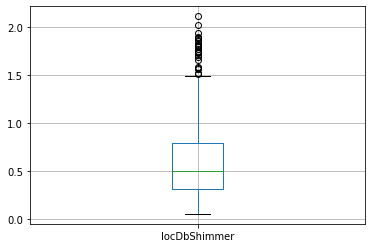

In [40]:
extracted_df.boxplot(column='locDbShimmer')

In [42]:
df.loc[df.locDbShimmer>=1.51, 'locDbShimmer'] = 1.51

Text(0.5, 0, 'locDbShimmer')

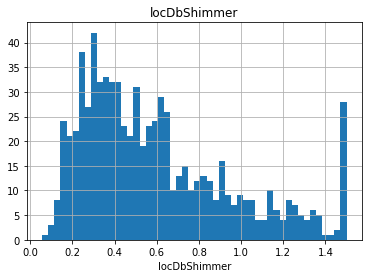

In [43]:
figure = df.locDbShimmer.hist(bins=50)
figure.set_title('locDbShimmer')
figure.set_xlabel('locDbShimmer')

<AxesSubplot:>

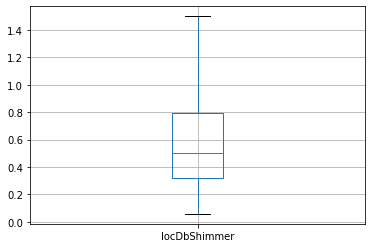

In [44]:
df.boxplot(column='locDbShimmer')

In [45]:
# compute IQR to calculate boundaries
IQR_locShim = extracted_df.locShimmer.quantile(0.75) - extracted_df.locShimmer.quantile(0.25)
IQR_locShim

0.04945

In [46]:
lower_bridge = extracted_df.locShimmer.quantile(0.25) - (IQR_locShim*1.5)
upper_bridge = extracted_df.locShimmer.quantile(0.75) + (IQR_locShim*1.5)
upper_bridge, lower_bridge

(0.1597225, -0.03807750000000001)

In [47]:
# extreme outliers
lower_bridge = extracted_df.locShimmer.quantile(0.25) - (IQR_locShim*3)
upper_bridge = extracted_df.locShimmer.quantile(0.75) + (IQR_locShim*3)
upper_bridge, lower_bridge

(0.2338975, -0.1122525)

Text(0.5, 0, 'locShimmer')

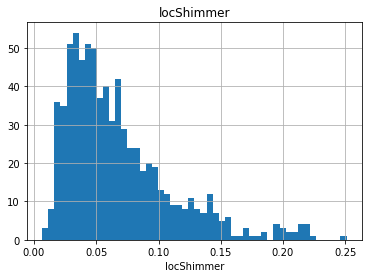

In [48]:
figure = extracted_df.locShimmer.hist(bins=50)
figure.set_title('locShimmer')
figure.set_xlabel('locShimmer')

<AxesSubplot:>

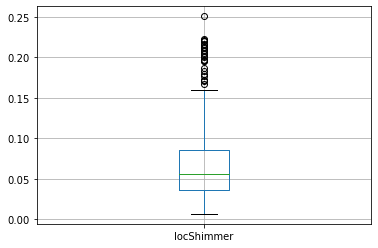

In [49]:
extracted_df.boxplot('locShimmer')

In [53]:
df.loc[df.locShimmer>=0.159, 'locShimmer'] = 0.159

Text(0.5, 0, 'locShimmer')

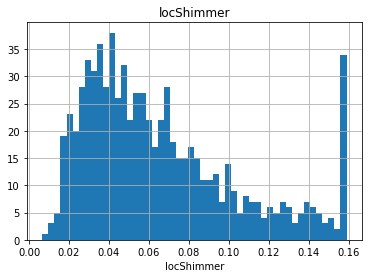

In [54]:
figure = df.locShimmer.hist(bins=50)
figure.set_title('locShimmer')
figure.set_xlabel('locShimmer')

<AxesSubplot:>

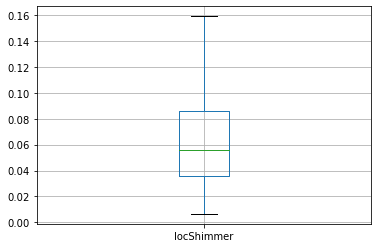

In [55]:
df.boxplot(column='locShimmer')

In [56]:
# compute IQR to calculate boundaries
IQR_apq3 = extracted_df.apq3Shimmer.quantile(0.75) - extracted_df.apq3Shimmer.quantile(0.25)
IQR_apq3

0.026822500000000003

In [57]:
lower_bridge = extracted_df.apq3Shimmer.quantile(0.25) - (IQR_apq3*1.5)
upper_bridge = extracted_df.apq3Shimmer.quantile(0.75) + (IQR_apq3*1.5)
upper_bridge, lower_bridge

(0.08489875000000001, -0.022391250000000005)

In [58]:
#Extreme outliers

lower_bridge = extracted_df.apq3Shimmer.quantile(0.25) - (IQR_apq3*3)
upper_bridge = extracted_df.apq3Shimmer.quantile(0.75) + (IQR_apq3*3)
upper_bridge, lower_bridge

(0.1251325, -0.06262500000000001)

Text(0.5, 0, 'apq3Shimmer')

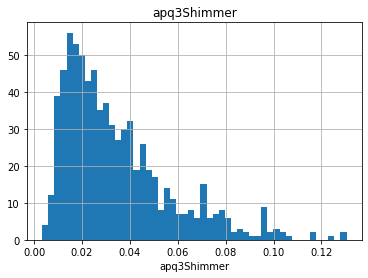

In [59]:
figure = extracted_df.apq3Shimmer.hist(bins=50)
figure.set_title('apq3Shimmer')
figure.set_xlabel('apq3Shimmer')

<AxesSubplot:>

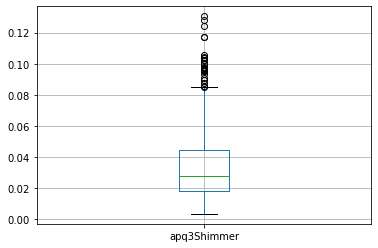

In [60]:
extracted_df.boxplot('apq3Shimmer')

In [61]:
df.loc[df.apq3Shimmer>=0.084, 'apq3Shimmer'] = 0.084

Text(0.5, 0, 'apq3Shimmer')

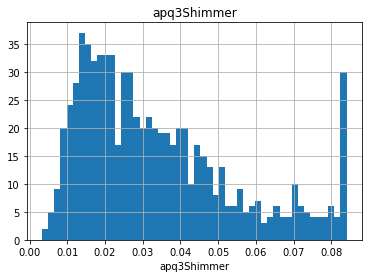

In [62]:
figure = df.apq3Shimmer.hist(bins=50)
figure.set_title('apq3Shimmer')
figure.set_xlabel('apq3Shimmer')

<AxesSubplot:>

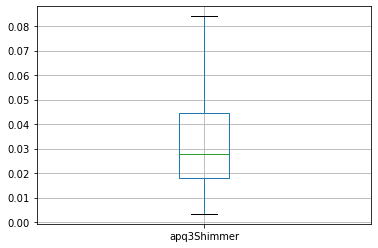

In [63]:
df.boxplot(column='apq3Shimmer')

In [64]:
# compute IQR to calculate boundaries
IQR_ddp = extracted_df.ddpJitter.quantile(0.75) - extracted_df.ddpJitter.quantile(0.25)
IQR_ddp

0.0015025

In [65]:
lower_bridge = extracted_df.ddpJitter.quantile(0.25) - (IQR_ddp*1.5)
upper_bridge = extracted_df.ddpJitter.quantile(0.75) + (IQR_ddp*1.5)
upper_bridge, lower_bridge

(0.00420625, -0.0018037499999999998)

In [66]:
# extreme outliers
lower_bridge = extracted_df.ddpJitter.quantile(0.25) - (IQR_ddp*3)
upper_bridge = extracted_df.ddpJitter.quantile(0.75) + (IQR_ddp*3)
upper_bridge, lower_bridge

(0.006459999999999999, -0.0040574999999999995)

Text(0.5, 0, 'apq3Shimmer')

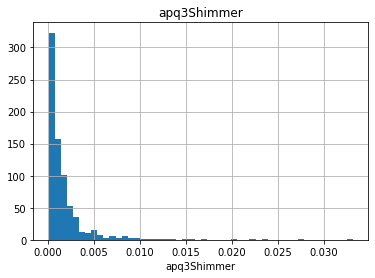

In [67]:
figure = extracted_df.ddpJitter.hist(bins=50)
figure.set_title('apq3Shimmer')
figure.set_xlabel('apq3Shimmer')

<AxesSubplot:>

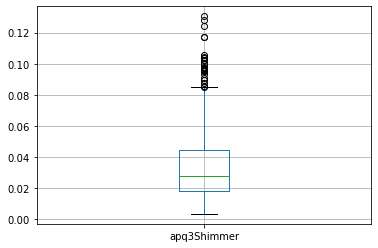

In [68]:
extracted_df.boxplot('apq3Shimmer')

In [60]:
df.loc[df.ddpJitter>=0.004, 'ddpJitter'] = 0.004

Text(0.5, 0, 'ddpJitter')

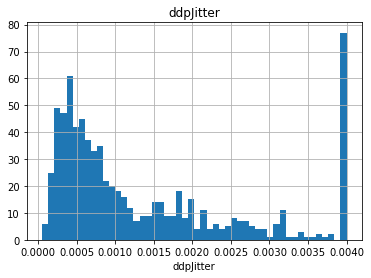

In [61]:
figure = df.ddpJitter.hist(bins=50)
figure.set_title('ddpJitter')
figure.set_xlabel('ddpJitter')

<AxesSubplot:>

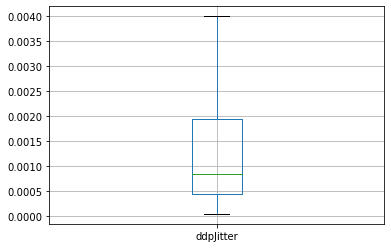

In [62]:
df.boxplot(column='ddpJitter')

In [118]:
# compute IQR to calculate boundaries
IQR_apq11 = extracted_df.apq11Shimmer.quantile(0.75) - extracted_df.apq11Shimmer.quantile(0.25)
IQR_apq11

0.0404225

In [119]:
# assuming apq11Shimmer follows a normal distributiowe will calculate boundaries which will differentiates the outliers
lower_boundary = extracted_df.apq11Shimmer.mean() + 3*extracted_df.apq11Shimmer.std()
upper_boundary = extracted_df.apq11Shimmer.mean() - 3*extracted_df.apq11Shimmer.std()
upper_boundary, lower_boundary

(-0.046451091439653175, 0.15718381489203406)

In [120]:
lower_bridge = extracted_df.apq11Shimmer.quantile(0.25) - (IQR_apq11*1.5)
upper_bridge = extracted_df.apq11Shimmer.quantile(0.75) + (IQR_apq11*1.5)
upper_bridge, lower_bridge

(0.13201875000000002, -0.02967125)

In [122]:
# extreme outliers
lower_bridge = extracted_df.apq11Shimmer.quantile(0.25) - (IQR_apq11*3)
upper_bridge = extracted_df.apq11Shimmer.quantile(0.75) + (IQR_apq11*3)
upper_bridge, lower_bridge

(0.1926525, -0.090305)

Text(0.5, 0, 'apq11Shimmer')

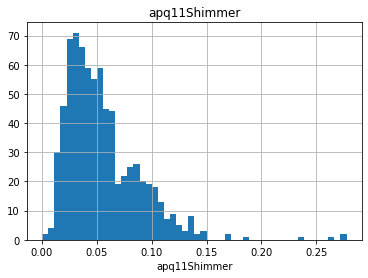

In [123]:
figure = extracted_df.apq11Shimmer.hist(bins=50)
figure.set_title('apq11Shimmer')
figure.set_xlabel('apq11Shimmer')

In [126]:
df.loc[df.apq11Shimmer>=0.19, 'apq11Shimmer'] = 0.19

Text(0.5, 0, 'apq11Shimmer')

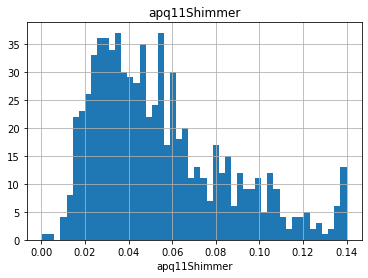

In [127]:
figure = df.apq11Shimmer.hist(bins=50)
figure.set_title('apq11Shimmer')
figure.set_xlabel('apq11Shimmer')

<AxesSubplot:>

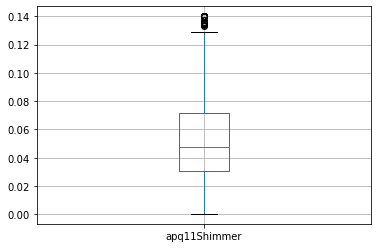

In [128]:
df.boxplot(column='apq11Shimmer')

In [70]:
# compute IQR to calculate boundaries
IQR_numper = extracted_df.numPeriodsPulses.quantile(0.75) - extracted_df.numPeriodsPulses.quantile(0.25)
IQR_numper

133.25

Text(0.5, 0, 'numPeriodsPulses')

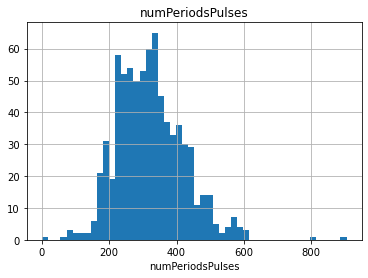

In [71]:
figure = extracted_df.numPeriodsPulses.hist(bins=50)
figure.set_title('numPeriodsPulses')
figure.set_xlabel('numPeriodsPulses')

In [73]:
upper_boundary_numper = extracted_df.numPeriodsPulses.mean() + 3*extracted_df.numPeriodsPulses.std()
lower_boundary_numper = extracted_df.numPeriodsPulses.mean() - 3*extracted_df.numPeriodsPulses.std()
upper_boundary_numper, lower_boundary_numper

(620.8860684932522, 24.471074363890693)

In [74]:
lower_bridge = extracted_df.numPeriodsPulses.quantile(0.25) - (IQR_numper*1.5)
upper_bridge = extracted_df.numPeriodsPulses.quantile(0.75) + (IQR_numper*1.5)
upper_bridge, lower_bridge

(583.125, 50.125)

In [75]:
# extreme outliers

lower_bridge = extracted_df.numPeriodsPulses.quantile(0.25) - (IQR_numper*3)
upper_bridge = extracted_df.numPeriodsPulses.quantile(0.75) + (IQR_numper*3)
upper_bridge, lower_bridge

(783.0, -149.75)

In [82]:
df.loc[df.numPeriodsPulses>=583, 'numPeriodsPulses'] = 583

Text(0.5, 0, 'numPeriodsPulses')

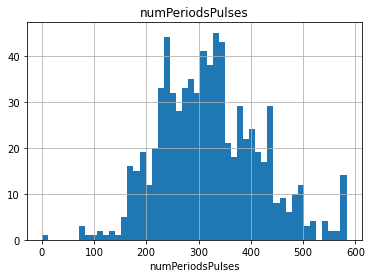

In [83]:
figure = df.numPeriodsPulses.hist(bins=50)
figure.set_title('numPeriodsPulses')
figure.set_xlabel('numPeriodsPulses')

<AxesSubplot:>

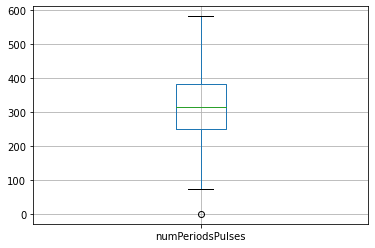

In [86]:
df.boxplot(column='numPeriodsPulses')

In [87]:
# compute IQR to calculate boundaries
IQR_abs = extracted_df.locAbsJitter.quantile(0.75) - extracted_df.locAbsJitter.quantile(0.25)
IQR_abs

1.3065000000000001e-05

In [94]:
lower_bridge = extracted_df.locAbsJitter.quantile(0.25) - (IQR_abs*1.5)
upper_bridge = extracted_df.locAbsJitter.quantile(0.75) + (IQR_abs*1.5)
upper_bridge, lower_bridge

(3.79225e-05, -1.4337500000000003e-05)

In [95]:
# extreme outliers
lower_bridge = extracted_df.locAbsJitter.quantile(0.25) - (IQR_abs*3)
upper_bridge = extracted_df.locAbsJitter.quantile(0.75) + (IQR_abs*3)
upper_bridge, lower_bridge

(5.7520000000000005e-05, -3.3935000000000006e-05)

Text(0.5, 0, 'locAbsJitter')

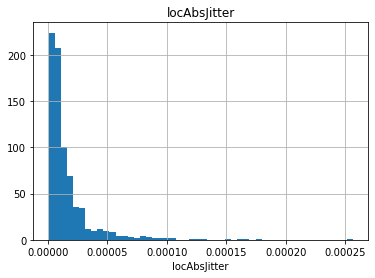

In [97]:
figure = extracted_df.locAbsJitter.hist(bins=50)
figure.set_title('locAbsJitter')
figure.set_xlabel('locAbsJitter')

In [104]:
df.loc[df.locAbsJitter>=0.000057, 'locAbsJitter'] = 0.000057

Text(0.5, 0, 'locAbsJitter')

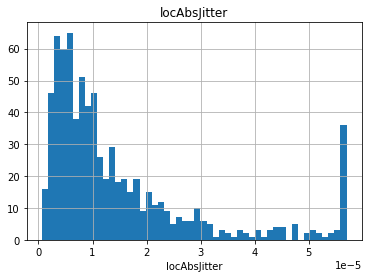

In [105]:
figure = df.locAbsJitter.hist(bins=50)
figure.set_title('locAbsJitter')
figure.set_xlabel('locAbsJitter')

<AxesSubplot:>

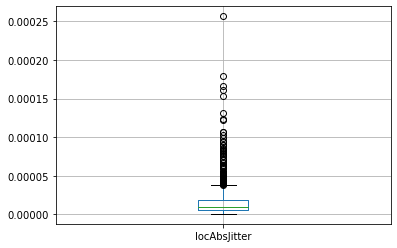

In [106]:
extracted_df.boxplot(column='locAbsJitter')

<AxesSubplot:>

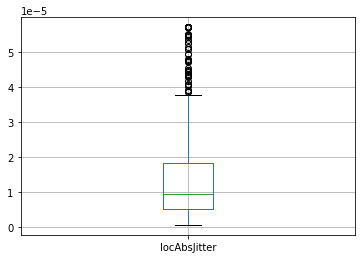

In [107]:
df.boxplot(column='locAbsJitter')

# Outliers Detection using Mahalanobis

Mahalonobis computes is the distance between a point and a distribution, not between two distinct points.

D^2 = (x – m)^T . C^(-1) . (x – m)

where,
 - D^2        is the square of the Mahalanobis distance.
 - x          is the vector of the observation (row in a dataset),
 - m          is the vector of mean values of independent variables (mean of each column),
 - C^(-1)     is the inverse covariance matrix of independent variables.

In [24]:
def mahalanobis(x=None, data=None, cov=None):
    x_minus_mean = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    right_term = np.dot(x_minus_mean, inv_covmat)
    mhl_dist = np.dot(right_term, x_minus_mean.T)
    return mhl_dist.diagonal()

df = extracted_df.copy()
df['mahalanobis'] = mahalanobis(x=extracted_df, data=extracted_df)
df.head()

,ddpJitter,locPctJitter,ppq5Jitter,locAbsJitter,locDbShimmer,DFA,RPDE,locShimmer,apq5Shimmer,numPulses,...,f1,f2,f3,f4,b1,b2,b3,b4,class,mahalanobis
1,0.00200,0.00218,0.00129,0.000018,0.517,0.71826,0.57227,0.05883,0.03496,240.0,...,539.342735,1031.849040,2447.162183,3655.054806,101.092218,83.147440,255.214830,396.643631,1.0,12.096627
2,0.00157,0.00195,0.00112,0.000016,0.502,0.69481,0.53966,0.05516,0.03675,234.0,...,564.363615,1016.367294,2383.565201,3498.681572,58.465428,86.487292,248.357127,218.229722,1.0,10.173951
3,0.00171,0.00176,0.00111,0.000015,0.897,0.67604,0.58982,0.09902,0.06497,232.0,...,548.444604,1032.406341,2357.826954,3678.128717,160.387771,54.685168,151.694847,84.240339,1.0,12.277390
4,0.00446,0.00419,0.00268,0.000046,0.527,0.79672,0.59257,0.05451,0.02857,178.0,...,819.529588,1201.813897,3154.035654,4122.163933,238.667052,191.984916,573.752909,526.147599,1.0,30.401644
5,0.00499,0.00535,0.00227,0.000044,0.497,0.79782,0.53028,0.05610,0.03327,236.0,...,846.796144,1215.346469,3201.513132,4085.456839,402.216738,210.061394,203.637106,384.611697,1.0,31.652633


Degree of freeedom calculated as,

df = number of independent values — number of statistics

Assuming that the test statistic follows chi-square distributed with ‘n’ degree of freedom, the critical value at a 0.01 significance level and 27 degrees of freedom is computed as:

In [25]:
from scipy.stats import chi2

chi2.ppf((1-0.01), df=27)

46.962942124751436

In [26]:
df.sort_values(by='mahalanobis').head()

,ddpJitter,locPctJitter,ppq5Jitter,locAbsJitter,locDbShimmer,DFA,RPDE,locShimmer,apq5Shimmer,numPulses,...,f1,f2,f3,f4,b1,b2,b3,b4,class,mahalanobis
592,0.00051,0.00091,0.00042,0.000005,0.342,0.73097,0.39407,0.03851,0.02347,354.0,...,606.675248,1220.991510,2633.039631,3592.659318,219.297363,265.642813,144.907573,331.417764,1.0,4.363782
493,0.00123,0.00195,0.00095,0.000016,0.355,0.68788,0.54836,0.04060,0.02540,241.0,...,539.234600,1145.702996,2547.753275,3528.597176,96.388296,119.075124,267.707290,169.650348,1.0,4.641476
501,0.00063,0.00127,0.00050,0.000008,0.352,0.73710,0.40519,0.04007,0.02517,305.0,...,623.776458,1343.396584,2482.392535,3425.895113,165.026414,341.946889,395.364962,352.282618,1.0,5.381648
19,0.00075,0.00177,0.00061,0.000012,0.422,0.66085,0.44583,0.04810,0.02692,283.0,...,674.292881,1233.233624,2469.663237,3267.527013,93.289078,69.914097,208.089548,111.941511,1.0,5.562496
476,0.00065,0.00156,0.00058,0.000009,0.276,0.66248,0.38960,0.03136,0.01946,350.0,...,623.567981,1251.661819,2535.129857,3524.027694,101.387349,26.526226,404.335786,220.259996,1.0,5.966387


In [27]:
df.sort_values(by='mahalanobis').tail()

,ddpJitter,locPctJitter,ppq5Jitter,locAbsJitter,locDbShimmer,DFA,RPDE,locShimmer,apq5Shimmer,numPulses,...,f1,f2,f3,f4,b1,b2,b3,b4,class,mahalanobis
426,0.03315,0.02775,0.01832,0.000256,1.769,0.75583,0.84980,0.21727,0.11939,112.0,...,504.181576,1129.639962,2476.732486,3503.107173,350.303297,665.390955,278.458998,675.243011,1.0,222.003644
75,0.00321,0.00333,0.00159,0.000023,0.612,0.70358,0.67909,0.06911,0.04027,286.0,...,682.940115,1384.748256,2455.882070,3606.493448,4744.875736,148.082502,106.685036,209.221940,0.0,269.041993
341,0.02783,0.01800,0.01166,0.000179,1.050,0.72217,0.83083,0.10718,0.04646,94.0,...,635.506805,1273.903318,2598.440113,3699.851517,122.475999,90.754074,181.659901,309.463424,1.0,288.873903
439,0.00669,0.01535,0.00560,0.000166,0.595,0.64908,0.74388,0.06461,0.03936,179.0,...,635.209689,1052.098330,2601.221621,3247.886133,101.442549,166.316045,120.226378,458.157852,1.0,320.139210
471,0.00581,0.00774,0.00263,0.000022,1.862,0.65600,0.59176,0.21267,0.09946,598.0,...,611.695546,1295.739093,2466.917100,3488.932937,132.709051,873.566906,102.991978,171.701106,0.0,335.712709


In [28]:
df.loc[df.mahalanobis > 46.96]

,ddpJitter,locPctJitter,ppq5Jitter,locAbsJitter,locDbShimmer,DFA,RPDE,locShimmer,apq5Shimmer,numPulses,...,f1,f2,f3,f4,b1,b2,b3,b4,class,mahalanobis
13,0.00230,0.00280,0.00184,0.000011,1.814,0.78996,0.78026,0.20811,0.14476,492.0,...,493.187329,1256.570863,2337.449029,3320.689784,760.283532,229.348688,198.730042,464.080280,1.0,121.195677
22,0.00731,0.00653,0.00389,0.000047,1.891,0.81029,0.71652,0.22066,0.10565,267.0,...,468.387563,1147.072390,2488.578468,3955.303835,362.006150,334.446582,440.182042,554.072188,1.0,116.033438
23,0.01482,0.01268,0.00499,0.000123,1.246,0.73507,0.75672,0.13048,0.06968,175.0,...,592.568254,1215.341781,2393.936878,3967.050874,175.986911,193.821722,903.106338,875.649543,1.0,161.474176
50,0.00261,0.00360,0.00110,0.000018,1.457,0.70885,0.63610,0.15324,0.10048,385.0,...,680.701195,1193.497792,3045.269942,3890.494202,116.749626,221.102580,206.591216,75.909788,1.0,52.062254
51,0.00270,0.00314,0.00110,0.000015,1.745,0.78348,0.74030,0.20158,0.13676,389.0,...,822.184802,1113.372261,3151.662049,3831.464970,186.555858,661.116939,166.224166,200.656222,1.0,47.195134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,0.01592,0.01214,0.00938,0.000107,1.694,0.69923,0.84808,0.19636,0.11127,134.0,...,528.066889,1130.970134,2670.498962,3431.545111,88.086813,141.211829,230.695694,147.331447,1.0,91.577831
661,0.00160,0.00199,0.00112,0.000018,0.376,0.71681,0.66809,0.04286,0.02492,209.0,...,609.472639,990.674456,2748.277761,3648.440769,318.849972,163.124257,76.614258,5804.342078,1.0,78.885488
672,0.00695,0.00702,0.00222,0.000049,0.870,0.69699,0.61460,0.09479,0.06080,273.0,...,579.437659,1155.349956,3050.208434,3799.535542,90.553130,71.623747,204.356284,495.549665,1.0,60.403447
680,0.00036,0.00120,0.00032,0.000006,0.301,0.62437,0.50215,0.03328,0.02023,416.0,...,754.205881,1146.548354,2183.598582,3499.971963,113.487132,3000.642166,225.391573,366.825541,1.0,53.255073


We got 46.96 as the critical value which means that an observation can be cosidered as extreme if its Mahalanobis distance exceeds 46.96.

In case, if we want to use P value instead of MHL distance to determine that if an observation is outlier or not:

In [29]:
df['p_value'] = 1 - chi2.cdf(df['mahalanobis'], 27)

In [30]:
# Extreme values with a significance level of 0.01
df.loc[df.p_value < 0.01]

,ddpJitter,locPctJitter,ppq5Jitter,locAbsJitter,locDbShimmer,DFA,RPDE,locShimmer,apq5Shimmer,numPulses,...,f2,f3,f4,b1,b2,b3,b4,class,mahalanobis,p_value
13,0.00230,0.00280,0.00184,0.000011,1.814,0.78996,0.78026,0.20811,0.14476,492.0,...,1256.570863,2337.449029,3320.689784,760.283532,229.348688,198.730042,464.080280,1.0,121.195677,6.739054e-14
22,0.00731,0.00653,0.00389,0.000047,1.891,0.81029,0.71652,0.22066,0.10565,267.0,...,1147.072390,2488.578468,3955.303835,362.006150,334.446582,440.182042,554.072188,1.0,116.033438,5.222489e-13
23,0.01482,0.01268,0.00499,0.000123,1.246,0.73507,0.75672,0.13048,0.06968,175.0,...,1215.341781,2393.936878,3967.050874,175.986911,193.821722,903.106338,875.649543,1.0,161.474176,0.000000e+00
50,0.00261,0.00360,0.00110,0.000018,1.457,0.70885,0.63610,0.15324,0.10048,385.0,...,1193.497792,3045.269942,3890.494202,116.749626,221.102580,206.591216,75.909788,1.0,52.062254,2.607261e-03
51,0.00270,0.00314,0.00110,0.000015,1.745,0.78348,0.74030,0.20158,0.13676,389.0,...,1113.372261,3151.662049,3831.464970,186.555858,661.116939,166.224166,200.656222,1.0,47.195134,9.429681e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,0.01592,0.01214,0.00938,0.000107,1.694,0.69923,0.84808,0.19636,0.11127,134.0,...,1130.970134,2670.498962,3431.545111,88.086813,141.211829,230.695694,147.331447,1.0,91.577831,5.948921e-09
661,0.00160,0.00199,0.00112,0.000018,0.376,0.71681,0.66809,0.04286,0.02492,209.0,...,990.674456,2748.277761,3648.440769,318.849972,163.124257,76.614258,5804.342078,1.0,78.885488,5.565123e-07
672,0.00695,0.00702,0.00222,0.000049,0.870,0.69699,0.61460,0.09479,0.06080,273.0,...,1155.349956,3050.208434,3799.535542,90.553130,71.623747,204.356284,495.549665,1.0,60.403447,2.334917e-04
680,0.00036,0.00120,0.00032,0.000006,0.301,0.62437,0.50215,0.03328,0.02023,416.0,...,1146.548354,2183.598582,3499.971963,113.487132,3000.642166,225.391573,366.825541,1.0,53.255073,1.874634e-03
